In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import * 
pd.options.display.max_columns = 1000

import tensorflow as tf

%matplotlib inline

In [7]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

In [17]:
import requests
url = "https://raw.githubusercontent.com/abulbasar/machine-learning/master/Utils.py"
exec(requests.get(url).text)

In [20]:
tf.reset_default_graph()
tf.set_random_seed(1)
n_x = 784
n_y = 10
max_iters = 100

X = tf.placeholder(dtype=tf.float32, shape=(None, n_x))
y = tf.placeholder(dtype=tf.int32, shape=(None,))
print("X",X)
print("y", y)

y_oh = tf.one_hot(indices=y, depth=n_y)
print("y_oh", y_oh)


W = tf.Variable(initial_value=tf.truncated_normal(shape=[n_x, n_y], stddev=0.1))
b = tf.Variable(initial_value=tf.zeros([n_y]))

print("W", W)
print("b", b)

# Forward prop

Z = tf.matmul(X, W) + b
print("Z", Z)

y_pred = tf.argmax(Z, axis=1, output_type=tf.int32)
print("y_pred", y_pred)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), tf.float32))
print("accuracy", accuracy)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=y_oh))
print("cost", cost)

op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    batchable = Batchable(X_train, y_train)
    
    scores = {}
    for i in range(max_iters): 
        X_batch, y_batch = batchable.next()
        _, cost_ = sess.run([op, cost]
                            , feed_dict = {X: X_batch, y: y_batch})
        scores[i] = cost_
        
        if i % max_iters//20 == 0 or i == max_iters - 1:
            training_accuracy_ = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
            testing_accuracy_ = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
            print(i,"Training accuracy", training_accuracy_,
                 "Test accuracy", testing_accuracy_)


X Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot:0", shape=(?, 10), dtype=float32)
W <tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>
b <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>
Z Tensor("add:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
cost Tensor("Mean_1:0", shape=(), dtype=float32)
0 Training accuracy 0.179 Test accuracy 0.1885
1 Training accuracy 0.30781665 Test accuracy 0.3194
2 Training accuracy 0.46285 Test accuracy 0.4724
3 Training accuracy 0.58388335 Test accuracy 0.5979
4 Training accuracy 0.6485 Test accuracy 0.6636
5 Training accuracy 0.7000167 Test accuracy 0.7114
6 Training accuracy 0.7335167 Test accuracy 0.7487
7 Training accuracy 0.7482833 Test accuracy 0.7644
8 Training accuracy 0.75663334 Test accuracy 0.7709
9 Training accuracy 0.76528335 Test accuracy 0.7831
10 Trai

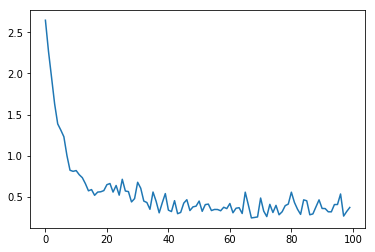

In [21]:
pd.Series(scores).plot()

X Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot:0", shape=(?, 10), dtype=float32)
W1 <tf.Variable 'Variable:0' shape=(784, 100) dtype=float32_ref>
b1 <tf.Variable 'Variable_1:0' shape=(100,) dtype=float32_ref>
Z Tensor("add:0", shape=(?, 100), dtype=float32)
A1 Tensor("Relu:0", shape=(?, 100), dtype=float32)
W2 <tf.Variable 'Variable_2:0' shape=(100, 10) dtype=float32_ref>
b2 <tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>
Z2 Tensor("add_1:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
cost Tensor("Mean_1:0", shape=(), dtype=float32)
0 Training accuracy 0.23646666 Test accuracy 0.2433
50 Training accuracy 0.90926665 Test accuracy 0.9162
100 Training accuracy 0.93406665 Test accuracy 0.9358
150 Training accuracy 0.9446333 Test accuracy 0.9438
200 Training accuracy 0.94878334 Test accuracy 0.9494
250 Trainin

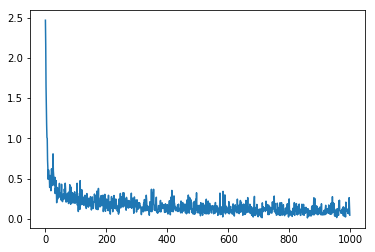

In [37]:
tf.reset_default_graph()
tf.set_random_seed(1)
n_x = 28 * 28 
n_y = 10
n_h = 100
max_iters = 1000

X = tf.placeholder(dtype=tf.float32, shape=(None, n_x))
y = tf.placeholder(dtype=tf.int32, shape=(None,))
print("X",X)
print("y", y)

y_oh = tf.one_hot(indices=y, depth=n_y)
print("y_oh", y_oh)


W1 = tf.Variable(initial_value=tf.truncated_normal(shape=[n_x, n_h], stddev=0.1))
b1 = tf.Variable(initial_value=tf.zeros([n_h]))

print("W1", W1)
print("b1", b1)

# Forward prop

Z1 = tf.matmul(X, W1) + b1
print("Z", Z1)

A1 = tf.nn.relu(Z1)
print("A1", A1)


W2 = tf.Variable(initial_value=tf.truncated_normal(shape=[n_h, n_y], stddev=0.1))
b2 = tf.Variable(initial_value=tf.zeros([n_y]))

print("W2", W2)
print("b2", b2)

# Forward prop

Z2 = tf.matmul(A1, W2) + b2
print("Z2", Z2)


y_pred = tf.argmax(Z2, axis=1, output_type=tf.int32)
print("y_pred", y_pred)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), tf.float32))
print("accuracy", accuracy)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z2, labels=y_oh))
print("cost", cost)

op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    batchable = Batchable(X_train, y_train, batch_size=64)
    
    scores = {}
    for i in range(max_iters): 
        X_batch, y_batch = batchable.next()
        _, cost_ = sess.run([op, cost]
                            , feed_dict = {X: X_batch, y: y_batch})
        scores[i] = cost_
        
        if i % (max_iters//20) == 0 or i == max_iters - 1:
            training_accuracy_ = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
            testing_accuracy_ = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
            print(i,"Training accuracy", training_accuracy_,
                 "Test accuracy", testing_accuracy_)
    
    pd.Series(scores).plot()

X Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
cost Tensor("Mean_1:0", shape=(), dtype=float32)
0 Training accuracy 0.23063333 Test accuracy 0.2332
50 Training accuracy 0.8901833 Test accuracy 0.8963
100 Training accuracy 0.9173833 Test accuracy 0.9211
150 Training accuracy 0.92965 Test accuracy 0.9283
200 Training accuracy 0.93348336 Test accuracy 0.9335
250 Training accuracy 0.9432 Test accuracy 0.9424
300 Training accuracy 0.94345 Test accuracy 0.9413
350 Training accuracy 0.9443667 Test accuracy 0.9446
400 Training accuracy 0.95176667 Test accuracy 0.9501
450 Training accuracy 0.9479333 Test accuracy 0.948
500 Training accuracy 0.95665 Test accuracy 0.9525
550 Training accuracy 0.95295 Test accuracy 0.947
600 Training accuracy 0.9558 Test accuracy 0.9519
650 Trainin

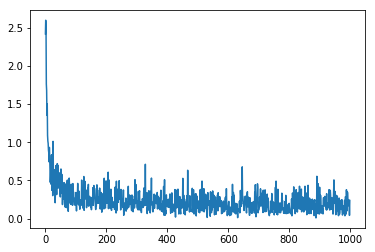

In [52]:
tf.reset_default_graph()
tf.set_random_seed(1)
n_x = 28 * 28 
n_y = 10
n_h = 100
max_iters = 1000

X = tf.placeholder(dtype=tf.float32, shape=(None, n_x))
y = tf.placeholder(dtype=tf.int32, shape=(None,))
print("X",X)
print("y", y)

y_oh = tf.one_hot(indices=y, depth=n_y)
print("y_oh", y_oh)


def add_dense(input, size, activation = tf.nn.relu):
    n = int(input.get_shape()[1])
    W = tf.Variable(initial_value=tf.truncated_normal(shape=[n, size], stddev=0.1))
    b = tf.Variable(initial_value=tf.zeros([size]))
    Z = tf.matmul(input, W) + b
    
    if callable(activation):
        Z = activation(Z)
    return Z
    
A1 = add_dense(X, 400)
A2 = add_dense(A1, 100)
Z = add_dense(A2, 10, activation = None)

y_pred = tf.argmax(Z, axis=1, output_type=tf.int32)
print("y_pred", y_pred)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), tf.float32))
print("accuracy", accuracy)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=y_oh))
print("cost", cost)

op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    batchable = Batchable(X_train, y_train, batch_size=64)
    
    scores = {}
    for i in range(max_iters): 
        X_batch, y_batch = batchable.next()
        _, cost_ = sess.run([op, cost]
                            , feed_dict = {X: X_batch, y: y_batch})
        scores[i] = cost_
        
        if i % (max_iters//20) == 0 or i == max_iters - 1:
            training_accuracy_ = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
            testing_accuracy_ = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
            print(i,"Training accuracy", training_accuracy_,
                 "Test accuracy", testing_accuracy_)
    
    pd.Series(scores).plot()

